In [2]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 30, 15

def to_mtx(img):
    H,V,C = img.shape
    mtr = np.zeros((V,H,C), dtype='int')
    for i in range(img.shape[0]):
        mtr[:,i] = img[i]
    
    return mtr

def to_img(mtr):
    V,H,C = mtr.shape
    img = np.zeros((H,V,C), dtype='int')
    for i in range(mtr.shape[0]):
        img[:,i] = mtr[i]
        
    return img

def warpPerspective(img, M, dsize):
    mtr = to_mtx(img)
    R,C = dsize
    dst = np.zeros((R,C,mtr.shape[2]))
    for i in range(mtr.shape[0]):
        for j in range(mtr.shape[1]):
            res = np.dot(M, [i,j,1])
            i2,j2,_ = (res / res[2] + 0.5).astype(int)
            if i2 >= 0 and i2 < R:
                if j2 >= 0 and j2 < C:
                    dst[i2,j2] = mtr[i,j]
    
    return to_img(dst)

In [3]:
img = cv2.imread("1.png")
H = np.array([
    [8.7976964e-01,   3.1245438e-01,  -3.9430589e+01],
    [-1.8389418e-01,   9.3847198e-01,   1.5315784e+02],
    [1.9641425e-04,  -1.6015275e-05,   1.0000000e+00]])

In [4]:
destination_size = (img.shape[1],img.shape[0])
dst = warpPerspective(img, H, destination_size)
cv2.imwrite("H_output.png",dst)

True

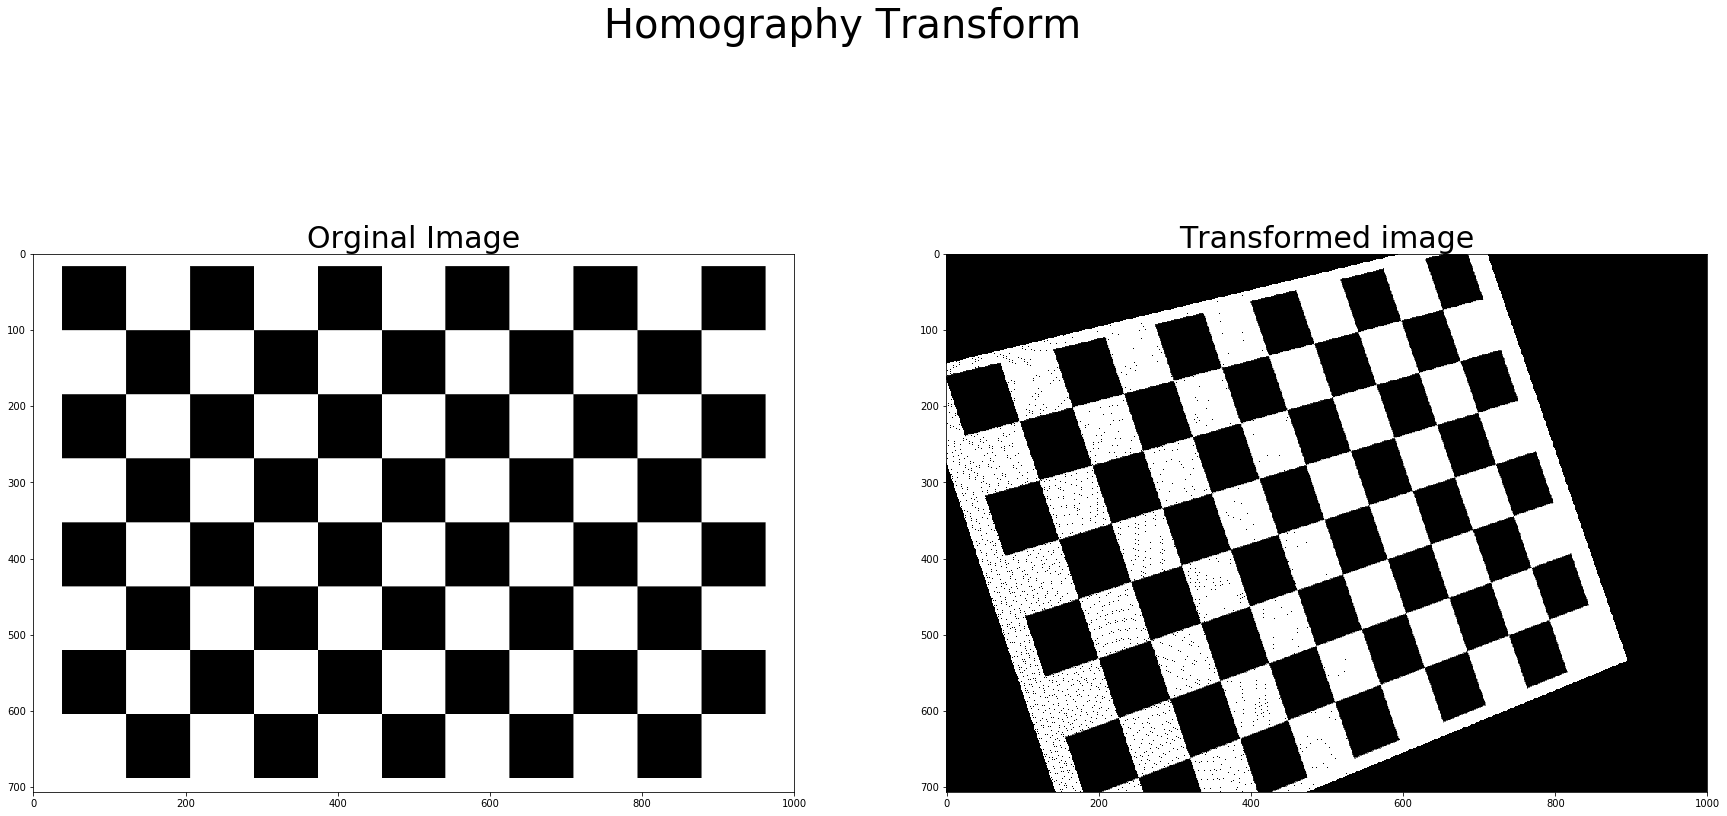

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)
fig.suptitle('Homography Transform', fontsize=40)
ax1.set_title('Orginal Image', fontsize=30)
im1 = ax1.imshow(img)
ax2.set_title('Transformed image', fontsize=30)
im2 = ax2.imshow(dst)
plt.show()